## Buisnes Problem Understanding
**Context**

Sebuah hotel yang berada diPortugal dalam kegiatan pelayanannya seringkali menerima pembatalan mendadak yang dilakukan oleh pemesan. Hal ini menyebabkan kerugian finansial yang dialami pihak hotel dan mempengaruhi reputasi bisnis. Oleh karena itu, pengelola hotel ingin mengetahui pelanggan mana saja yang berpotensi untuk membatalkan pesanan agar tidak merugikan pihak hotel sacara finansial.

TARGET
0 = tidak cancel
1 = cancel

**Problem Statement**

Pelanggan/pemesan yang membatalkan pemesanan kamar secara mendadak menyebabkan kerugian secara finansial kepada pihak hotel dikarenakan pihak hotel tidak bisa mencari pengganti pelanggan dalam waktu yag cepat sehingga kamar yang seharusnya terisi menjadi kosong. Jika pihak hotel dapat mendeteksi lebih awal bahwa pelanggan tersebut membatalkan pemesanan maka bisa saja pada hari yang sama terdapat pelanggan baru yang memesan kamar tersebut sehingga pihak hotel tidak mengalami kerugian finansial akibat pembatalan pemesanan.

**Goals**

Dari permasalahan diatas maka pihak hotel ingin memiliki kemampuan untuk mendeteksi pelanggan mana saja yang berpotensi untuk melakukan pembatalan pemesanan, sehingga pihak hotel dapat mempertimbangkan untuk membuka kembali pemesanan pada kamar tersebut sehingga tidak mengalami kerugian secara finansial.

**Analytic Approach**

Jadi untuk menangani hal tersebut kita ingin membangun machine learning klasifikasi yang akan membantu perusahaan untuk memprediksi pelanggan mana yang berpotensi membatalkan pesanan atau tidak.

**Matrix Evaluation**

1. Type 1 eror: False Positif (Jika model memprediksi cancel teryata pada kenyataannya tidak cancel)

    Konsekuensi= pihak hotel harus memberikan upgrade kamar jika kamar yang sama telah penuh. potensi mengalami kerugian akibat upgrade kamar sebesar $18,69 [traveloka](https://www.traveloka.com/en-id).

2. Type 2 Eror: False Negatif (Jika model memprediksi tidak cancel tetapi pada kenyataannya cancel)

    konsekuensi: Pihak hotel mengalami kerugian dikarenakan kamar yang seharusnya terisi menjadi kosong atau tidak tersewakan. kerugian yang dialami pihak hotel akibat tidak tersewanya kamar sebesar $99 [link](https://www.budgetyourtrip.com/hotels/portugal-PT)

Berdasarkan konsekuensinya, kita sebisa mungkin membuat model yang mengurangi type 2 eror dikarenakan kerugian yang dihasilkan paling besar. Jadi matrix utama yang kita gunakan yaitu F2 dengan mempertimbangkan juga pada precisionnya.

## Data Understanding

Data Source: https://drive.google.com/drive/folders/17KIeOXK7eYGuzgpn_IljlUFcE4v96lSL



### Attribute Information
| Attribute | Data Type | Description |
| --- | --- | --- |
| country | Object | Negara asal |
| market_segment | Object | segmen pasar |
| previous_cancellations | int | Jumlah pemesanan sebelumnya yang dibatalkan oleh pelanggan sebelum pemesanan saat ini. |
| booking_changes | int | Jumlah perubahan/perubahan yang dilakukan pada pemesanan dari saat pemesanan dimasukkan pada PMS hingga saat check-in atau pembatalan |
| deposit_type | Object | Indikasi apakah pelanggan melakukan deposit untuk menjamin pemesanan |
| days_in_waiting_list | int | Jumlah hari pemesanan berada dalam daftar tunggu sebelum dikonfirmasi kepada pelanggan |
| customer_type | Object | Tipe customer |
| reserved_room_type | Object | Kode jenis kamar yang dipesan. Kode ditampilkan sebagai pengganti nama untuk alasan anonimitas |
| required_car_parking_space | int | Jumlah ruang parkir mobil yang dibutuhkan oleh pelanggan |
| total_of_special_request | int | Jumlah permintaan khusus yang diajukan oleh pelanggan (misalnya tempat tidur kembar atau lantai tinggi) |
| is_canceled | int | Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0) |



In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [3]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'Name': df.columns.values,
    'Type': df.dtypes.values,
    'N/A (%)': df.isna().mean().values * 100,
    'Unique': df.nunique().values,
    'Sample': [df[col].unique() for col in df.columns]
})

,Name,Type,N/A (%),Unique,Sample
0,country,object,0.419992,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, B..."
1,market_segment,object,0.000000,8,"[Offline TA/TO, Online TA, Direct, Groups, Cor..."
2,previous_cancellations,int64,0.000000,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19,..."
3,booking_changes,int64,0.000000,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12,..."
4,deposit_type,object,0.000000,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,int64,0.000000,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31..."
6,customer_type,object,0.000000,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,object,0.000000,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,int64,0.000000,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,int64,0.000000,6,"[0, 2, 1, 3, 4, 5]"


## **Exploratory Data Analysis**
* Bagaimana bentuk distribusi data? 
* Bagaimana korelasi data pada dataset?
* Bagaimana keterkaitan antara feature dengan target?

array([[<Axes: title={'center': 'previous_cancellations'}>,
        <Axes: title={'center': 'booking_changes'}>],
       [<Axes: title={'center': 'days_in_waiting_list'}>,
        <Axes: title={'center': 'required_car_parking_spaces'}>],
       [<Axes: title={'center': 'total_of_special_requests'}>,
        <Axes: title={'center': 'is_canceled'}>]], dtype=object)

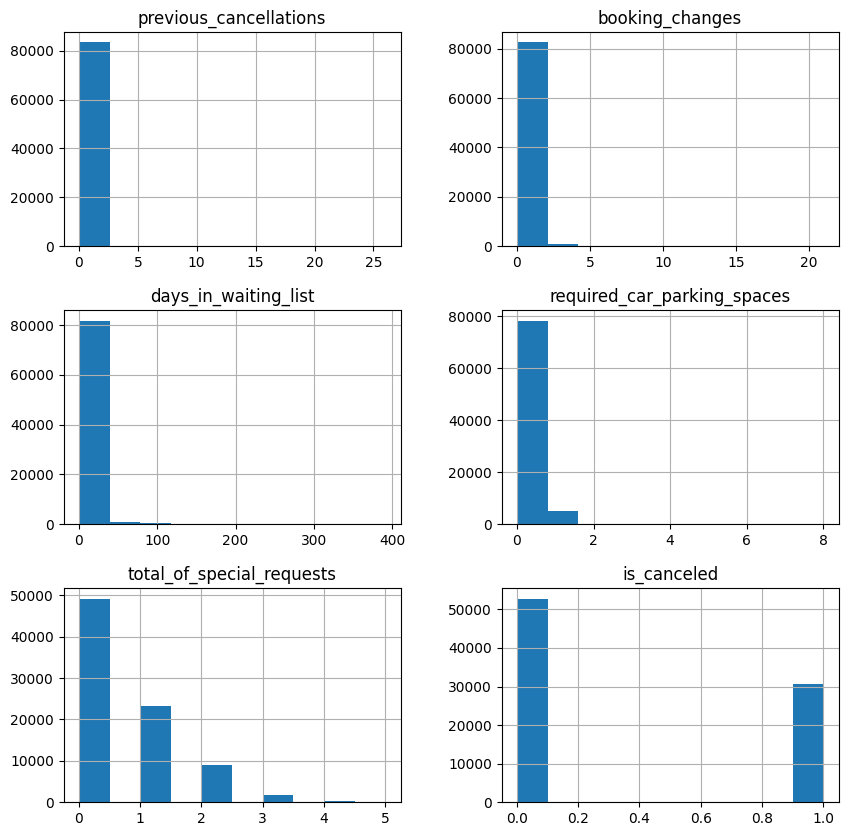

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize=(10, 10))

<Axes: >

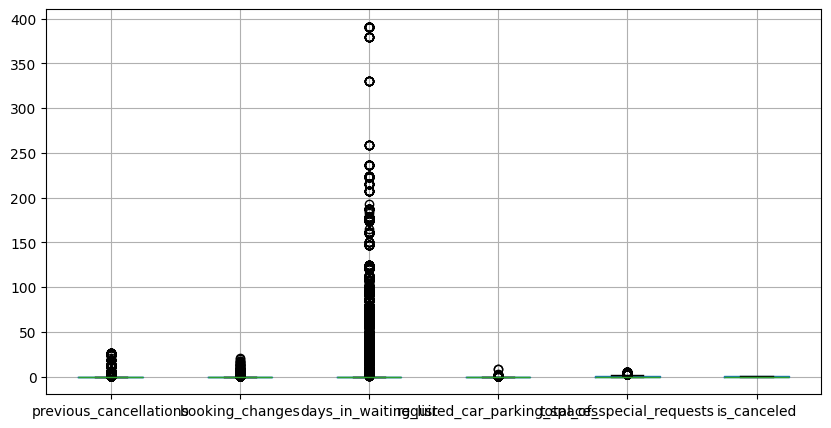

In [5]:
df.boxplot(figsize=(10, 5))

Semua data tidak ada yang berdistribusi normal

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [7]:
country10=df['country'].value_counts().reset_index().nlargest(10, 'country')
country10

,index,country
0,PRT,34097
1,GBR,8495
2,FRA,7307
3,ESP,5996
4,DEU,5116
5,ITA,2658
6,IRL,2340
7,BEL,1648
8,BRA,1553
9,USA,1472


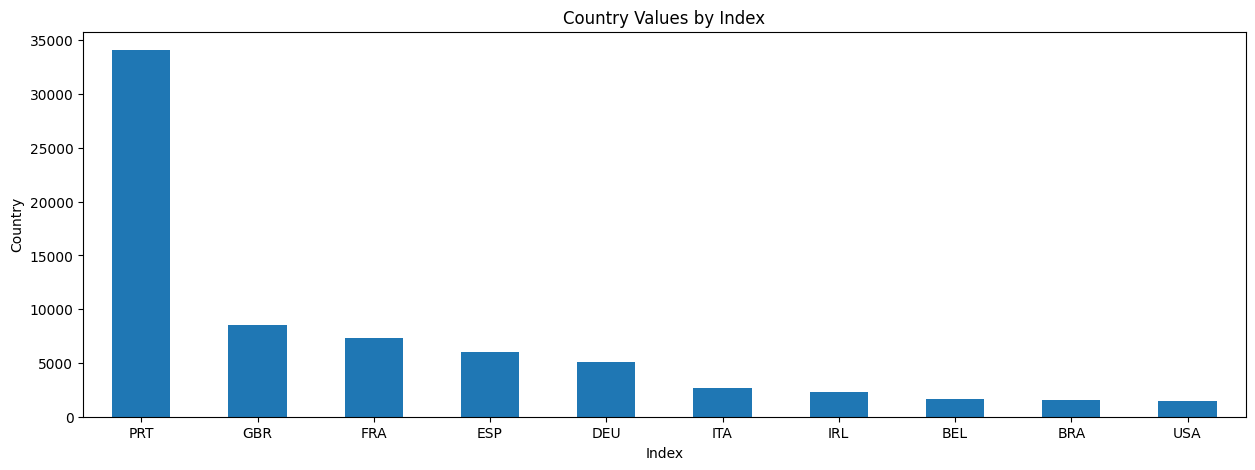

In [8]:
country10.plot(kind='bar', x='index', y='country', rot=0, figsize=(15, 5), legend=False)

plt.title('Country Values by Index')
plt.xlabel('Index')
plt.ylabel('Country')

plt.show()

pemesan hotel paling banyak berasal dari PRT

Text(0.5, 1.0, 'market_segment')

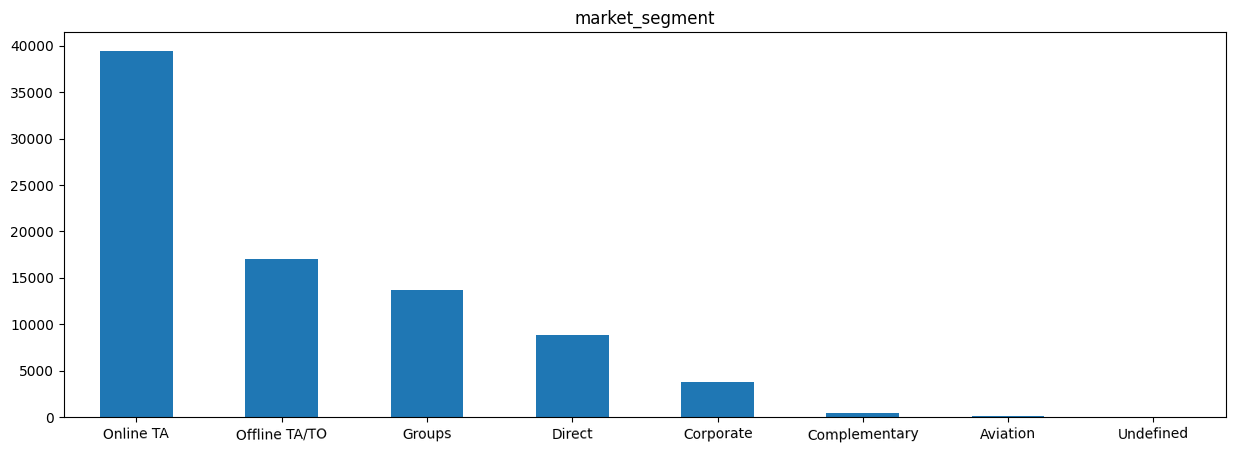

In [9]:
df['market_segment'].value_counts().plot(kind='bar', rot=1, figsize=(15, 5)).set_title('market_segment')

Market segment pemesan hotel/pengunjug hotel terbesar merupakan pemesan melalui online

Text(0.5, 1.0, 'deposit_type')

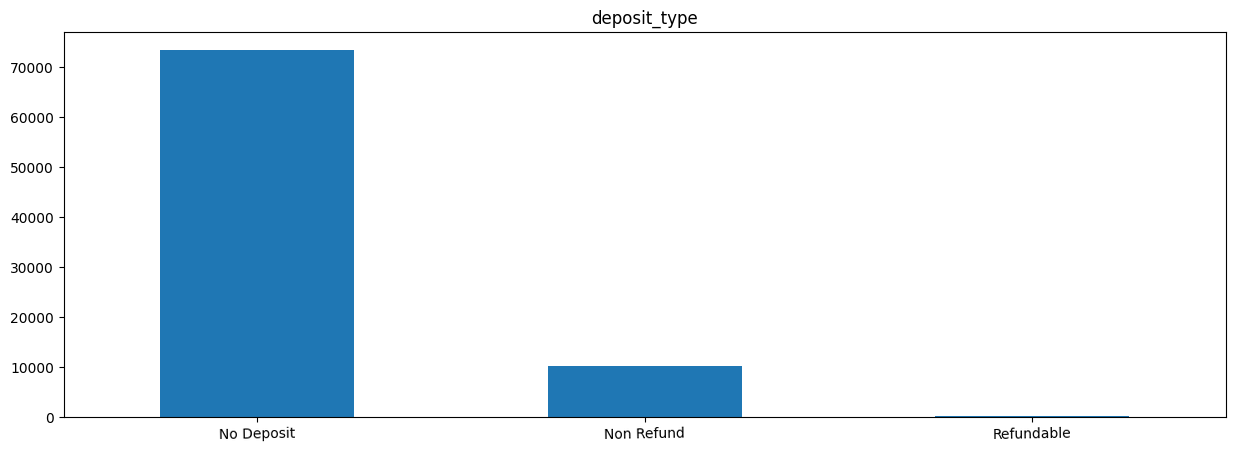

In [10]:
df['deposit_type'].value_counts().plot(kind='bar', rot=1, figsize=(15, 5)).set_title('deposit_type')

sebagian besar pengunjung tidak melakukan doposit

Text(0.5, 1.0, 'customer_type')

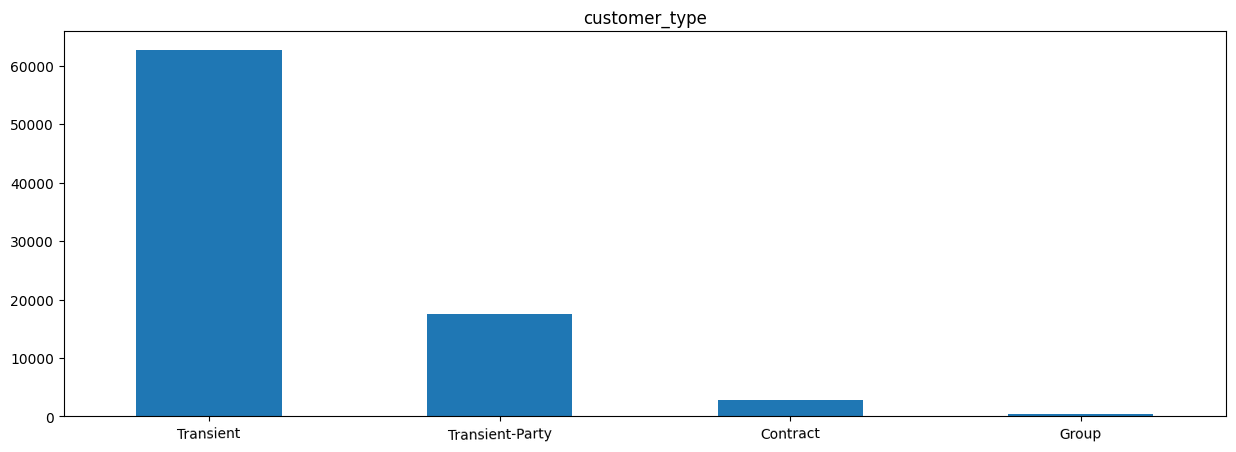

In [11]:
df['customer_type'].value_counts().plot(kind='bar', rot=1, figsize=(15, 5)).set_title('customer_type')

tipe customer terbesar yaitu tipe transient

Text(0.5, 1.0, 'reserved_room_type')

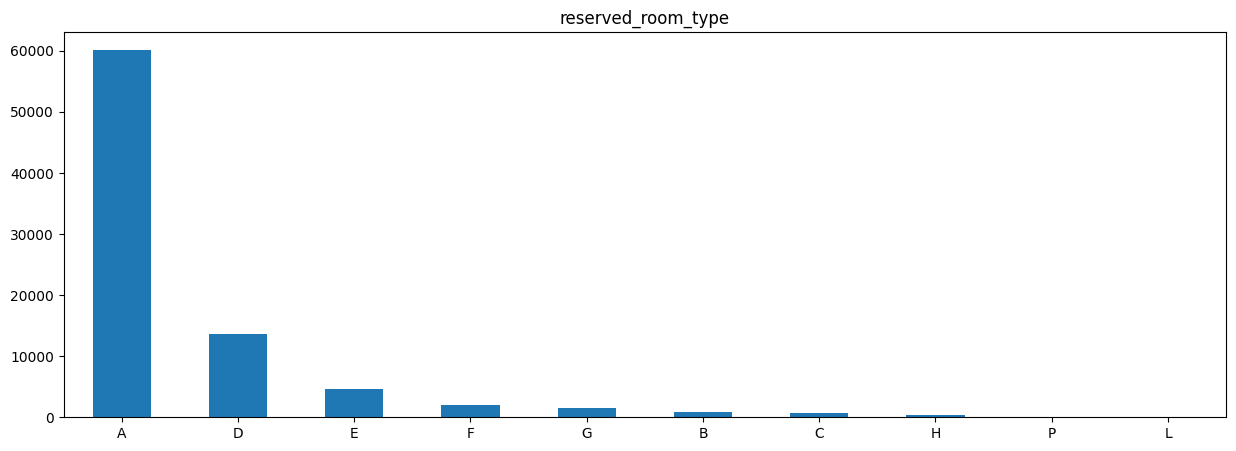

In [12]:
df['reserved_room_type'].value_counts().plot(kind='bar', rot=1, figsize=(15, 5)).set_title('reserved_room_type')

tipe kamar yang banyak dipesan yaitu kamar tipe A

In [13]:
df.corr('spearman',numeric_only=True).style.background_gradient(cmap='Blues')

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.072986,0.119905,-0.043598,-0.128345,0.269936
booking_changes,-0.072986,1.000000,-0.017053,0.078030,0.044410,-0.184935
days_in_waiting_list,0.119905,-0.017053,1.000000,-0.043863,-0.125175,0.100823
required_car_parking_spaces,-0.043598,0.078030,-0.043863,1.000000,0.088456,-0.197214
total_of_special_requests,-0.128345,0.044410,-0.125175,0.088456,1.000000,-0.259394
is_canceled,0.269936,-0.184935,0.100823,-0.197214,-0.259394,1.000000


In [14]:
import phik
df.select_dtypes(include='object').phik_matrix()\
    .style.background_gradient(cmap='Blues')

,country,market_segment,deposit_type,customer_type,reserved_room_type
country,1.000000,0.452452,0.550297,0.238182,0.238119
market_segment,0.452452,1.000000,0.508427,0.556138,0.280519
deposit_type,0.550297,0.508427,1.000000,0.103519,0.245738
customer_type,0.238182,0.556138,0.103519,1.000000,0.182412
reserved_room_type,0.238119,0.280519,0.245738,0.182412,1.000000


* terdapat korelasi yang cukup tinggi antar feature yaitu:
    * country dan market_segment
    * country dan deposite_type
    * country dan is_canceld
    * market_segment dan customer_type
    * Market_segment dan deposite_type

* terdapat korelasi yang kecil anatara feature dengan target

## **Data Preparation**
* Identifikasi dan kuantifikasi masalah data seperti:
    1. Missing value
    2. Duplicated value
    3. Outlier
    4. Type data
    5. Column name
    6. Collinearity
* Lakukan penanganan terhadap masalah data yang ditemukan.
* Lakukan feature engineering seperti:
    1. Feature transformation
    2. Feature creation
    3. Feature selection
* Buatlah pipeline dari tahap ini.

**Cek Missing Value**

In [15]:
df.isna().mean()*100

country                        0.419992
market_segment                 0.000000
previous_cancellations         0.000000
booking_changes                0.000000
deposit_type                   0.000000
days_in_waiting_list           0.000000
customer_type                  0.000000
reserved_room_type             0.000000
required_car_parking_spaces    0.000000
total_of_special_requests      0.000000
is_canceled                    0.000000
dtype: float64

terdapat missing value sebanyak 0,4% pada colom country

**Cek Duplicate**

In [16]:
df[df.duplicated()]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


terdapat data duplicate sebanyak 73371 baris

**Cek Outlier**

In [17]:
def outlier(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df.loc[(df[column]<lower_bound)|(df[column]>upper_bound)]
    print(f"the number of outliers in '{column}' is {(len(outliers)/len(df)*100):.2f}% of total data ({len(df)} rows)")


In [18]:
for col in df.select_dtypes(include=np.number).columns:
    outlier(df,col)

the number of outliers in 'previous_cancellations' is 5.40% of total data (83573 rows)
the number of outliers in 'booking_changes' is 15.20% of total data (83573 rows)
the number of outliers in 'days_in_waiting_list' is 3.09% of total data (83573 rows)
the number of outliers in 'required_car_parking_spaces' is 6.25% of total data (83573 rows)
the number of outliers in 'total_of_special_requests' is 2.45% of total data (83573 rows)
the number of outliers in 'is_canceled' is 0.00% of total data (83573 rows)


**Cek Type data dan nama kolom**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


**INSIGHT**

* type data sudah sesuai dengan isi sehingga tidak perlu dilakukan perubahan 
* nama kolom sudah sesuai dan tidak perlu dilakukan perubahan

**CEK COLLINEARITY**

In [20]:
df.corr('spearman',numeric_only=True).style.background_gradient(cmap='Blues')

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.072986,0.119905,-0.043598,-0.128345,0.269936
booking_changes,-0.072986,1.000000,-0.017053,0.078030,0.044410,-0.184935
days_in_waiting_list,0.119905,-0.017053,1.000000,-0.043863,-0.125175,0.100823
required_car_parking_spaces,-0.043598,0.078030,-0.043863,1.000000,0.088456,-0.197214
total_of_special_requests,-0.128345,0.044410,-0.125175,0.088456,1.000000,-0.259394
is_canceled,0.269936,-0.184935,0.100823,-0.197214,-0.259394,1.000000


In [21]:
import phik
df.loc[:,['country','market_segment','deposit_type','customer_type','reserved_room_type','is_canceled']].phik_matrix(interval_cols=['is_canceled'])\
    .style.background_gradient(cmap='Blues')

,country,market_segment,deposit_type,customer_type,reserved_room_type,is_canceled
country,1.000000,0.452452,0.550297,0.238182,0.238119,0.444530
market_segment,0.452452,1.000000,0.508427,0.556138,0.280519,0.359348
deposit_type,0.550297,0.508427,1.000000,0.103519,0.245738,0.297877
customer_type,0.238182,0.556138,0.103519,1.000000,0.182412,0.200644
reserved_room_type,0.238119,0.280519,0.245738,0.182412,1.000000,0.097515
is_canceled,0.444530,0.359348,0.297877,0.200644,0.097515,1.000000


terdapat collyinearity antara lain:
* country dan market_segment
* country dan deposite_type
* country dan is_canceld
* market_segment dan customer_type
* Market_segment dan deposite_type



## Penanganan
1. isi missing value country dengan modus
2. hapus data yang duplicate
3. handle outlier jika menggunakan model berbasis jarak dikarenakan outliar dapat berpengaruh dengan model yang berbasis jarak. penanganan outliar dapat dilakukan dengan discretization Equal frequency binning karena lebih kebal terhadap outlier
4. Untuk menangani collinearity maka pada kolom yang mempunyai moderate correlation yang berpotensi collinearity maka kolom country,market segment,deposite_type tidak dimasukkan dalam fiture

In [22]:
## hapus data duplicate
# df.drop_duplicates(keep='first',inplace=True)
df.drop_duplicates(subset=['previous_cancellations',
       'booking_changes', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests'],keep='first',inplace=True)

In [23]:
df=df[df['market_segment']!='Undefined']

In [24]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


### Evaluation Matric
Pada pembuatan machine learning ini kita menggunakan matric evaluation F2 score, dimana F2 score ini sama dengan F1 score yang membadakan F2 score lebih mementingkan 2x recall dari pada precision. Matric F2 score ini digunakan untuk meminimalisir type 2 eror, dimana pada kasus ini total kerugian akibat type 2 eror lebih tinggi dari pada type 1 eror. Berikut perhitungan F2 error:
$$
F_2=\frac{(1+ 2^2)\times (\text{precision}\times \text{recall})}{2^2\times\text{precision}+\text{recall}}
$$


## Create Model

**Split Data**

In [25]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 10

# Split dataset
df_seen, df_unseen = train_test_split(df, stratify=df['is_canceled'],test_size=0.2, random_state=RANDOM_STATE)

**Pipeline**

In [26]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder
from pycaret.internal.preprocess.transformers import TransformerWrapper
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from imblearn.under_sampling import NearMiss
from mlxtend.feature_selection import ColumnSelector
from imblearn.over_sampling import SMOTE
from pycaret.internal.preprocess.transformers import FixImbalancer
from sklearn.metrics import fbeta_score

# Integrasikan data preparation + feature engineering sebagai pipeline data preprocessor
pipeline = [
    ("onehot", TransformerWrapper(
        include=['market_segment','deposit_type','customer_type'], 
        transformer=OneHotEncoder(drop='first'))),

    ("binary", TransformerWrapper(
        include=['country','reserved_room_type'], 
        transformer=BinaryEncoder())),
]

In [27]:
from pycaret.classification import *

configs = {
    'data': df_seen, 
    'target': 'is_canceled', 
    'train_size': 0.8,
    'verbose': False,
    'preprocess': None,
    'session_id': RANDOM_STATE, 
    'custom_pipeline_position': 0,
    'ignore_features':['country','market_segment','deposit_type'],
    'system_log': False,
    'log_experiment': False,
} 


## Experiment Model

### Experiment 1 : Original
Tanpa tambahan/murni pipeline

In [28]:
exp1=ClassificationExperiment()
exp1.setup(custom_pipeline=pipeline,**configs),
exp1.add_metric('F2', 'F2', fbeta_score, beta=2),
exp1.get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
                                                                   transformer=BinaryEncoder(base=2,
                                                                                             cols=['reserved_room_type'],
                                                                                             drop_invariant=False,
                                                                                             handle_missing='value',
                                                                                             handle_unknown='value',
                                                                                             mapping=[{'col': 'reserved_room_type',
                                                                                                       'mapping':      reserved_room_type_0  reserved_room_type_1  reserved_room_type_2  \
 1                      0                     0                     0   
 2                      0                     0                     1   
 3                      0                     0                     1   
 4                      0                     1                     0   
 5                      0                     1                     0   
 6                      0                     1                     1   
 7                      0                     1                     1   
 8                      1                     0                     0   
 9                      1                     0                     0   
 10                     1                     0                     1   
-1                      0                     0                     0   
-2                      0                     0                     0   

     reserved_room_type_3  
 1                      1  
 2                      0  
 3                      1  
 4                      0  
 5                      1  
 6                      0  
 7                      1  
 8                      0  
 9                      1  
 10                     0  
-1                      0  
-2                      0  }],
                                                                                             return_df=True,
                                                                                             verbose=0))))],
         verbose=False)

In [29]:
bm1=exp1.compare_models(sort='F2')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.5538,0.8017,0.9318,0.3372,0.4949,0.2299,0.3292,0.6882,1.3180
gbc,Gradient Boosting Classifier,0.8786,0.9044,0.6539,0.7920,0.7155,0.6393,0.6446,0.6771,1.4730
lightgbm,Light Gradient Boosting Machine,0.8504,0.8926,0.6492,0.7009,0.6725,0.5759,0.5777,0.6580,3.6680
rf,Random Forest Classifier,0.8590,0.8811,0.6279,0.7404,0.6755,0.5866,0.5924,0.6453,1.4640
et,Extra Trees Classifier,0.8492,0.8489,0.6332,0.7090,0.6636,0.5673,0.5724,0.6439,2.6120
ada,Ada Boost Classifier,0.8664,0.8818,0.6176,0.7721,0.6845,0.6011,0.6083,0.6425,1.3730
dt,Decision Tree Classifier,0.8149,0.7536,0.6384,0.6049,0.6185,0.4969,0.4990,0.6297,1.3160
knn,K Neighbors Classifier,0.8310,0.7939,0.5132,0.6972,0.5883,0.4849,0.4958,0.5403,1.3790
lr,Logistic Regression,0.8173,0.8395,0.4608,0.6587,0.5385,0.4300,0.4425,0.4885,1.4080
qda,Quadratic Discriminant Analysis,0.3371,0.1103,0.8000,0.1862,0.3021,-0.0024,-0.0062,0.4822,1.3110


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

melakukkan hyperparameter tunning pada best model eksperiment 1 yaitu pada model naive bayes

In [30]:
##hyperparameter tunning
hyper_exp1=exp1.tune_model(bm1,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.6341,0.8396,0.9474,0.3830,0.5455,0.3216,0.4155,0.7317
1,0.5244,0.8446,1.0000,0.3276,0.4935,0.2219,0.3533,0.7090
2,0.6098,0.8346,1.0000,0.3725,0.5429,0.3098,0.4282,0.7480
3,0.5976,0.8454,1.0000,0.3654,0.5352,0.2964,0.4171,0.7422
4,0.5244,0.7870,0.9474,0.3214,0.4800,0.2049,0.3121,0.6818
5,0.5000,0.8258,0.9500,0.3220,0.4810,0.1836,0.2914,0.6835
6,0.5309,0.7122,0.7895,0.3061,0.4412,0.1558,0.2090,0.6000
7,0.5556,0.7903,0.8947,0.3333,0.4857,0.2186,0.3039,0.6693
8,0.5309,0.7666,0.8421,0.3137,0.4571,0.1752,0.2436,0.6299


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Experiment 2 : Binning
pada experimen ke 2 kita mencoba melakukkan handle outliar menggunakan Equal frequency binning

In [31]:
## eksperiment 2
exp2=ClassificationExperiment()
exp2.setup(custom_pipeline=pipeline+[(('Equal frequency discretization',TransformerWrapper(
        include=['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
        transformer=KBinsDiscretizer(strategy='quantile'))))],**configs
        ),
exp2.add_metric('F2', 'F2', fbeta_score, beta=2),
exp2.get_config('pipeline')

                   

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['previous_cancellations',
                                                                            'booking_changes',
                                                                            'days_in_waiting_list',
                                                                            'required_car_parking_spaces',
                                                                            'total_of_special_requests'],
                                                                   transformer=KBinsDiscretizer(dtype=None,
                                                                                                encode='onehot',
                                                                                                n_bins=5,
                                                                                                random_state=None,
                                                                                                strategy='quantile',
                                                                                                subsample='warn'))))],
         verbose=False)

In [32]:
bm2=exp2.compare_models(sort='F2')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.5037,0.7983,0.9842,0.3193,0.4820,0.1984,0.3228,0.6945,1.4110
ada,Ada Boost Classifier,0.8333,0.8370,0.4979,0.7130,0.5733,0.4770,0.4950,0.5239,1.6280
lda,Linear Discriminant Analysis,0.8369,0.8258,0.4874,0.7328,0.5742,0.4813,0.5017,0.5174,1.4570
knn,K Neighbors Classifier,0.8173,0.8063,0.4871,0.6429,0.5502,0.4396,0.4483,0.5098,1.4100
lr,Logistic Regression,0.8357,0.8412,0.4771,0.7322,0.5667,0.4740,0.4954,0.5081,1.4310
lightgbm,Light Gradient Boosting Machine,0.8136,0.8237,0.4763,0.6306,0.5364,0.4250,0.4342,0.4978,1.5280
rf,Random Forest Classifier,0.8038,0.8145,0.4766,0.6010,0.5292,0.4082,0.4137,0.4959,1.7870
et,Extra Trees Classifier,0.8038,0.7555,0.4663,0.6055,0.5240,0.4039,0.4108,0.4873,1.5200
dt,Decision Tree Classifier,0.7927,0.7212,0.4663,0.5744,0.5130,0.3835,0.3878,0.4836,1.3910
gbc,Gradient Boosting Classifier,0.8272,0.8372,0.4505,0.7140,0.5453,0.4468,0.4683,0.4833,1.5200


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [33]:
hyper_exp2=exp2.tune_model(bm2,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.5244,0.7686,1.0000,0.3276,0.4935,0.2219,0.3533,0.7090
1,0.4756,0.8091,1.0000,0.3065,0.4691,0.1773,0.3119,0.6884
2,0.5610,0.8246,1.0000,0.3455,0.5135,0.2579,0.3848,0.7252
3,0.4878,0.8847,1.0000,0.3115,0.4750,0.1881,0.3222,0.6934
4,0.5122,0.8079,1.0000,0.3220,0.4872,0.2104,0.3429,0.7037
5,0.4268,0.7823,1.0000,0.2985,0.4598,0.1347,0.2687,0.6803
6,0.5432,0.7581,1.0000,0.3393,0.5067,0.2407,0.3699,0.7197
7,0.5185,0.7738,0.9474,0.3214,0.4800,0.1996,0.3068,0.6818
8,0.4691,0.7653,0.8947,0.2931,0.4416,0.1364,0.2194,0.6343


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


dilihat dari hasil model terbaik dan dilakukan hyper parameter tunning didapatkan score F2 yang sama yaitu 0.6945

### Experimen 3 : Binning dan polynomial
pada experiment ke 3 kita mencoba melakukan handling outliar dengan Equal frequency binning dan handling imbalance dengan polynomial feature

In [34]:
## eksperiment 3
exp3=ClassificationExperiment()
exp3.setup(custom_pipeline=pipeline+[(('Equal frequency discretization',TransformerWrapper(
        include=['previous_cancellations', 'booking_changes', 'days_in_waiting_list',
       'required_car_parking_spaces', 'total_of_special_requests'],
        transformer=KBinsDiscretizer(strategy='quantile')))),
        ('poly',TransformerWrapper(
        transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
        )),],**configs
        ),
exp3.add_metric('F2', 'F2', fbeta_score, beta=2),
exp3.get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
                                                                            'total_of_special_requests'],
                                                                   transformer=KBinsDiscretizer(dtype=None,
                                                                                                encode='onehot',
                                                                                                n_bins=5,
                                                                                                random_state=None,
                                                                                                strategy='quantile',
                                                                                                subsample='warn')))),
                ('poly',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C'))))],
         verbose=False)

In [35]:
bm3=exp3.compare_models(sort='F2') 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:23:46
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
nb,Naive Bayes,0.5857,0.7040,0.9266,0.3539,0.5119,0.2615,0.3554,0.6996,1.4350
knn,K Neighbors Classifier,0.8160,0.8078,0.4763,0.6495,0.5438,0.4332,0.4444,0.5003,1.4400
rf,Random Forest Classifier,0.8013,0.8127,0.4818,0.5907,0.5286,0.4052,0.4096,0.4991,1.5750
dt,Decision Tree Classifier,0.7976,0.7358,0.4821,0.5805,0.5244,0.3981,0.4020,0.4978,1.4010
lightgbm,Light Gradient Boosting Machine,0.8001,0.8120,0.4763,0.5846,0.5218,0.3984,0.4031,0.4930,1.6080
lr,Logistic Regression,0.8112,0.8207,0.4713,0.6276,0.5317,0.4186,0.4283,0.4928,1.5630
et,Extra Trees Classifier,0.7976,0.7537,0.4663,0.5864,0.5170,0.3918,0.3973,0.4849,1.5100
ridge,Ridge Classifier,0.8112,0.0000,0.4611,0.6323,0.5276,0.4152,0.4258,0.4848,1.4610
lda,Linear Discriminant Analysis,0.7781,0.7400,0.4766,0.5269,0.4985,0.3573,0.3590,0.4847,1.5420
gbc,Gradient Boosting Classifier,0.8173,0.8252,0.4558,0.6577,0.5308,0.4244,0.4391,0.4819,1.6130


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [36]:
hyper_exp3=exp3.tune_model(bm3,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.7195,0.8079,1.0000,0.4524,0.6230,0.4463,0.5359,0.8051
1,0.6585,0.7561,0.9474,0.4000,0.5625,0.3510,0.4399,0.7438
2,0.6463,0.7698,1.0000,0.3958,0.5672,0.3520,0.4622,0.7661
3,0.6951,0.8095,1.0000,0.4318,0.6032,0.4133,0.5104,0.7917
4,0.5854,0.7072,0.8947,0.3469,0.5000,0.2493,0.3328,0.6800
5,0.5732,0.6992,0.9000,0.3529,0.5070,0.2411,0.3257,0.6870
6,0.6543,0.7606,0.8947,0.3953,0.5484,0.3306,0.4036,0.7143
7,0.6173,0.6791,0.7895,0.3571,0.4918,0.2493,0.3002,0.6356
8,0.5679,0.6439,0.7895,0.3261,0.4615,0.1939,0.2476,0.6148


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Dari hasil percobaan ke 3 didapatkan hasil yang lebih tinggi dari pada eksperiment ke sebelumnya. pada experiment ke 3 ini didapatkan model terbaik naive bayes yang telah dilakukan hyperparameter tunning dengan score F2 0.7147

### Eksperiment 4 : Polynomial
pada experiment ke 4 hanya melakukan handling imbalace dengan polynomial feature

In [37]:
## eksperiment 4
exp4=ClassificationExperiment()
exp4.setup(custom_pipeline=pipeline+[
        ('poly',TransformerWrapper(
        transformer=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
        )),],**configs
        ),
exp4.add_metric('F2', 'F2', fbeta_score, beta=2),
exp4.get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
 1                      0                     0                     0   
 2                      0                     0                     1   
 3                      0                     0                     1   
 4                      0                     1                     0   
 5                      0                     1                     0   
 6                      0                     1                     1   
 7                      0                     1                     1   
 8                      1                     0                     0   
 9                      1                     0                     0   
 10                     1                     0                     1   
-1                      0                     0                     0   
-2                      0                     0                     0   

     reserved_room_type_3  
 1                      1  
 2                      0  
 3                      1  
 4                      0  
 5                      1  
 6                      0  
 7                      1  
 8                      0  
 9                      1  
 10                     0  
-1                      0  
-2                      0  }],
                                                                                             return_df=True,
                                                                                             verbose=0)))),
                ('poly',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=PolynomialFeatures(degree=3,
                                                                                                  include_bias=False,
                                                                                                  interaction_only=False,
                                                                                                  order='C'))))],
         verbose=False)

In [38]:
bm4=exp4.compare_models(sort='F2') 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
gbc,Gradient Boosting Classifier,0.8811,0.9007,0.6487,0.8080,0.7178,0.6438,0.6512,0.6743,1.5570
et,Extra Trees Classifier,0.8442,0.8578,0.6595,0.6793,0.6656,0.5646,0.5672,0.6612,1.4790
rf,Random Forest Classifier,0.8565,0.8752,0.6384,0.7264,0.6764,0.5850,0.5892,0.6525,1.6560
lightgbm,Light Gradient Boosting Machine,0.8455,0.8770,0.6434,0.6920,0.6617,0.5625,0.5665,0.6495,1.5600
ada,Ada Boost Classifier,0.8626,0.8660,0.6279,0.7529,0.6816,0.5952,0.6012,0.6478,1.5110
dt,Decision Tree Classifier,0.8259,0.7645,0.6489,0.6266,0.6361,0.5220,0.5232,0.6433,1.4280
ridge,Ridge Classifier,0.8553,0.0000,0.6071,0.7388,0.6583,0.5688,0.5780,0.6254,1.4300
lda,Linear Discriminant Analysis,0.8406,0.8026,0.5966,0.6878,0.6327,0.5326,0.5387,0.6093,1.4550
qda,Quadratic Discriminant Analysis,0.8297,0.6829,0.4074,0.7503,0.5200,0.4298,0.4624,0.4453,1.4840
knn,K Neighbors Classifier,0.8028,0.7590,0.4032,0.6535,0.4911,0.3765,0.3977,0.4336,1.4470


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [39]:
hyper_exp4=exp4.tune_model(bm4,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.8780,0.8997,0.7895,0.7143,0.7500,0.6696,0.6711,0.7732
1,0.8415,0.8546,0.5789,0.6875,0.6286,0.5287,0.5319,0.5978
2,0.8780,0.9098,0.6842,0.7647,0.7222,0.6444,0.6460,0.6989
3,0.8415,0.9290,0.7895,0.6250,0.6977,0.5922,0.5996,0.7500
4,0.9146,0.9373,0.7895,0.8333,0.8108,0.7557,0.7562,0.7979
5,0.8415,0.8919,0.6500,0.6842,0.6667,0.5628,0.5631,0.6566
6,0.9012,0.8909,0.6842,0.8667,0.7647,0.7033,0.7112,0.7143
7,0.8395,0.8557,0.6316,0.6667,0.6486,0.5447,0.5451,0.6383
8,0.8395,0.8752,0.5789,0.6875,0.6286,0.5272,0.5303,0.5978


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


pada experiment ini didapatkan hasil yang turun dari pada eksperiment sebelumnya. pada experiment ini didapatkan model terbaik gradient boosting classifier yang telah dilakukan hyperparameter tunning didaptkan score F2 sebesar 0.6881

### Experiment 5 :Nearmis
pada experiment ke 5 ini kita mencoba melakukan handling imbalance dengan Nearmiss

In [40]:
## eksperiment 5
exp5=ClassificationExperiment()
exp5.setup(custom_pipeline=pipeline+[
        ('resampling', TransformerWrapper(
            transformer=FixImbalancer(NearMiss(version=3))))],**configs
        ),
exp5.add_metric('F2', 'F2', fbeta_score, beta=2),
exp5.get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
-1                      0                     0                     0   
-2                      0                     0                     0   

     reserved_room_type_3  
 1                      1  
 2                      0  
 3                      1  
 4                      0  
 5                      1  
 6                      0  
 7                      1  
 8                      0  
 9                      1  
 10                     0  
-1                      0  
-2                      0  }],
                                                                                             return_df=True,
                                                                                             verbose=0)))),
                ('resampling',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                                                n_neighbors=3,
                                                                                                                n_neighbors_ver3=3,
                                                                                                                sampling_strategy='auto',
                                                                                                                version=3)))))],
         verbose=False)

In [41]:
bm5=exp5.compare_models(sort='F2') 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
gbc,Gradient Boosting Classifier,0.8209,0.9068,0.8324,0.5882,0.6866,0.5674,0.5862,0.7663,1.5320
rf,Random Forest Classifier,0.8149,0.8919,0.8218,0.5762,0.6758,0.5524,0.5708,0.7558,1.5180
ada,Ada Boost Classifier,0.8075,0.8798,0.8168,0.5659,0.6668,0.5386,0.5577,0.7487,1.5930
lightgbm,Light Gradient Boosting Machine,0.8026,0.8850,0.7905,0.5593,0.6533,0.5217,0.5383,0.7286,1.5710
et,Extra Trees Classifier,0.7842,0.8605,0.8061,0.5283,0.6365,0.4931,0.5169,0.7276,1.5400
dt,Decision Tree Classifier,0.7695,0.7715,0.7750,0.5126,0.6143,0.4615,0.4833,0.7003,1.4790
nb,Naive Bayes,0.5331,0.8082,0.9429,0.3283,0.4868,0.2131,0.3159,0.6856,1.6080
ridge,Ridge Classifier,0.7425,0.0000,0.7384,0.4695,0.5716,0.4009,0.4244,0.6602,1.5630
lr,Logistic Regression,0.7463,0.8202,0.7229,0.4764,0.5704,0.4023,0.4234,0.6515,1.3980
lda,Linear Discriminant Analysis,0.7364,0.8170,0.7279,0.4603,0.5619,0.3871,0.4101,0.6501,1.5060


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [42]:
hyper_exp5=exp5.tune_model(bm5,optimize='F2')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pada experiment ini didapatkan model tertinggi dari eksperiment-eksperiment sebelumnya. Pada experiment ini didapatkan model terbaik yaitu Gradient Boosting Classifier yang telah dilakukan hyperparameter tunning dengan score F2 sebesar 0.7726

### Experimen 6 : Votting Classifier
kita melakukan coba melakukan votting model adaboost,random forest,dan Gradient Boosting Classifier yang diharapkan dapat meningkatkan score F2

In [43]:
exp6=ClassificationExperiment()
exp6.setup(custom_pipeline=pipeline+[
        ('resampling', TransformerWrapper(transformer=FixImbalancer(NearMiss(version=3))))],**configs
        ),
exp6.add_metric('F2', 'F2', fbeta_score, beta=2),
estimator=[
    exp6.create_model(estimator='ada',verbose=False),
    exp6.create_model(estimator='rf',verbose=False),
    exp6.create_model(estimator='gbc',verbose=False),
]
exp6.get_config('pipeline')


Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
-1                      0                     0                     0   
-2                      0                     0                     0   

     reserved_room_type_3  
 1                      1  
 2                      0  
 3                      1  
 4                      0  
 5                      1  
 6                      0  
 7                      1  
 8                      0  
 9                      1  
 10                     0  
-1                      0  
-2                      0  }],
                                                                                             return_df=True,
                                                                                             verbose=0)))),
                ('resampling',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                                                n_neighbors=3,
                                                                                                                n_neighbors_ver3=3,
                                                                                                                sampling_strategy='auto',
                                                                                                                version=3)))))],
         verbose=False)

In [44]:
model_blend=exp6.blend_models(estimator_list=estimator,optimize='F2',method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.8293,0.9307,0.7895,0.6000,0.6818,0.5681,0.5781,0.7426
1,0.8171,0.9006,0.8421,0.5714,0.6809,0.5591,0.5798,0.7692
2,0.8780,0.9315,0.8947,0.6800,0.7727,0.6915,0.7037,0.8416
3,0.8537,0.9440,0.9474,0.6207,0.7500,0.6528,0.6820,0.8571
4,0.9024,0.9582,0.9474,0.7200,0.8182,0.7532,0.7664,0.8911
5,0.8415,0.8879,0.8500,0.6296,0.7234,0.6157,0.6293,0.7944
6,0.8272,0.9143,0.6842,0.6190,0.6500,0.5356,0.5368,0.6701
7,0.8148,0.9045,0.8421,0.5714,0.6809,0.5571,0.5778,0.7692
8,0.8148,0.8752,0.6842,0.5909,0.6341,0.5111,0.5135,0.6633


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [45]:
hyper_exp6=exp6.tune_model(model_blend,optimize='F2')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:47:13
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.8293,0.9165,0.7895,0.6000,0.6818,0.5681,0.5781,0.7426
1,0.8171,0.9089,0.8947,0.5667,0.6939,0.5726,0.6030,0.8019
2,0.8780,0.9248,0.8947,0.6800,0.7727,0.6915,0.7037,0.8416
3,0.8415,0.9515,0.9474,0.6000,0.7347,0.6296,0.6630,0.8491
4,0.8780,0.9632,0.9474,0.6667,0.7826,0.7014,0.7223,0.8738
5,0.8659,0.8895,0.8500,0.6800,0.7556,0.6647,0.6725,0.8095
6,0.8272,0.9126,0.7368,0.6087,0.6667,0.5514,0.5560,0.7071
7,0.8148,0.9079,0.8947,0.5667,0.6939,0.5705,0.6011,0.8019
8,0.8272,0.8778,0.6842,0.6190,0.6500,0.5356,0.5368,0.6701


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Pada experiment ini didapatkan nilai score F2 tertinggi dari pada experiment sebelumnya yaitu dengan score F2 sebesar 0.7746. Eksperiment ini mengalami peningkatan score F2 sedikit lebih tinggi dari pada pada experiment ke 5. 

### Experiment 7 : Feature Selection
pada experiment ini kita coba melakukan fiture selection dengan F-Statistics yang diharapkan dapat meningkatkan score F2

In [46]:
setup(custom_pipeline=pipeline,**configs)
X_train=get_config('X_train_transformed')
y_train=get_config('y_train')

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
selector = SelectKBest(score_func=f_classif, k=5)

selector.fit(X_train, y_train)

X_train.columns[selector.get_support()]

Index(['previous_cancellations', 'customer_type_Transient',
       'customer_type_Transient-Party', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [48]:
## eksperiment 7
exp7=ClassificationExperiment()
exp7.setup(custom_pipeline=pipeline+[
        (('selector', ColumnSelector(cols=['previous_cancellations', 'booking_changes', 'customer_type_Transient',
       'customer_type_Transient-Party', 'required_car_parking_spaces','total_of_special_requests']))),
       ('resampling', TransformerWrapper(
        transformer=FixImbalancer(NearMiss(version=3))))],**configs
        ),
exp7.add_metric('F2', 'F2', fbeta_score, beta=2),
exp7.get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('onehot',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['market_segment',
                                                                            'deposit_type',
                                                                            'customer_type'],
                                                                   transformer=OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                                             handle_unknown='error...
                                                                     'customer_type_Transient-Party',
                                                                     'required_car_parking_spaces',
                                                                     'total_of_special_requests'],
                                                               drop_axis=False))),
                ('resampling',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=FixImbalancer(estimator=NearMiss(n_jobs=None,
                                                                                                                n_neighbors=3,
                                                                                                                n_neighbors_ver3=3,
                                                                                                                sampling_strategy='auto',
                                                                                                                version=3)))))],
         verbose=False)

In [49]:
bm7=exp7.compare_models(sort='F2') 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2,TT (Sec)
ada,Ada Boost Classifier,0.7977,0.8693,0.7742,0.5545,0.6433,0.5085,0.5245,0.7150,1.6430
gbc,Gradient Boosting Classifier,0.8173,0.8873,0.7537,0.5889,0.6595,0.5377,0.5467,0.7124,1.7030
nb,Naive Bayes,0.5061,0.8398,0.9842,0.3202,0.4830,0.2003,0.3258,0.6952,1.5540
rf,Random Forest Classifier,0.7768,0.8568,0.7382,0.5174,0.6077,0.4586,0.4734,0.6795,1.5460
lr,Logistic Regression,0.6984,0.8317,0.7855,0.4264,0.5501,0.3540,0.3938,0.6692,1.6150
ridge,Ridge Classifier,0.6923,0.0000,0.7908,0.4207,0.5464,0.3470,0.3896,0.6692,1.5220
lda,Linear Discriminant Analysis,0.6898,0.8364,0.7908,0.4187,0.5446,0.3439,0.3869,0.6680,1.5890
lightgbm,Light Gradient Boosting Machine,0.7732,0.8332,0.7168,0.5172,0.5993,0.4481,0.4604,0.6641,1.5840
knn,K Neighbors Classifier,0.8087,0.8060,0.6861,0.5841,0.6270,0.5004,0.5062,0.6601,1.5430
et,Extra Trees Classifier,0.7965,0.8453,0.6803,0.5535,0.6085,0.4731,0.4795,0.6490,1.6400


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [50]:
hyper_exp7=exp7.tune_model(bm7,optimize='F2')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.8171,0.8722,0.6842,0.5909,0.6341,0.5131,0.5155,0.6633
1,0.8171,0.8964,0.8421,0.5714,0.6809,0.5591,0.5798,0.7692
2,0.7439,0.8525,0.6842,0.4643,0.5532,0.3828,0.3969,0.6250
3,0.8049,0.9023,0.8421,0.5517,0.6667,0.5371,0.5610,0.7619
4,0.8415,0.9064,0.7368,0.6364,0.6829,0.5780,0.5807,0.7143
5,0.8537,0.9097,0.9000,0.6429,0.7500,0.6506,0.6690,0.8333
6,0.8272,0.8790,0.8421,0.5926,0.6957,0.5800,0.5975,0.7767
7,0.7901,0.8612,0.7895,0.5357,0.6383,0.4980,0.5166,0.7212
8,0.7901,0.8604,0.7895,0.5357,0.6383,0.4980,0.5166,0.7212


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Ternyata pada experiment kali ini didaptkan score yang lebih rendah dari experiment sebelumnya yaitu didapatkan score F2 sebesar 0.7169

### Kesimpulan Uji Coba Model 
berdasarkan hasil Eksperiment yang dilakukan berikut hasil terbaik dari setiap eksperiment:
* Experiment 1 F2=0.6882 dengan Model terbaik (Naive Bayes)
* Experiment 2 F2=0.6945 dengan Model terbaik (Naive Bayes)
* Experiment 3 F2=0.7147 dengan Model terbaik (Naive Bayes Tunning)
* Experiment 4 F2=0.6881 dengan Model terbaik (Gradient Boosting Classifier Tunning)
* Experiment 5 F2=0.7726 dengan Model terbaik (Gradient Boosting Classifier Tunning)
* Experiment 6 F2=0.7746 dengan Model terbaik (Votting Classifier Tunning)
* Experiment 7 F2=0.7169 dengan Model terbaik (Ada Boost Classifier Tunning)

berdasarkan hasil Experiment tersebut terdapat 2 model yang memiliki score F2 yang hampir sama yaitu pada experiment ke 5 dan ke 6. Walaupun pada experiment ke 6 memiliki score F2 paling tinggi tetapi implementasi model yang sangat rumit dan kami memutuskan untuk menggunakan model terbaik pada eksperiment ke 5 yaitu Gradient Boosting Classifier yang telah dilakukan hyperparameter tunning dengan score F2 sebesar 0.7726 sebagai final model kita

### Evaluasi Model

**Grafik ROC AUC**

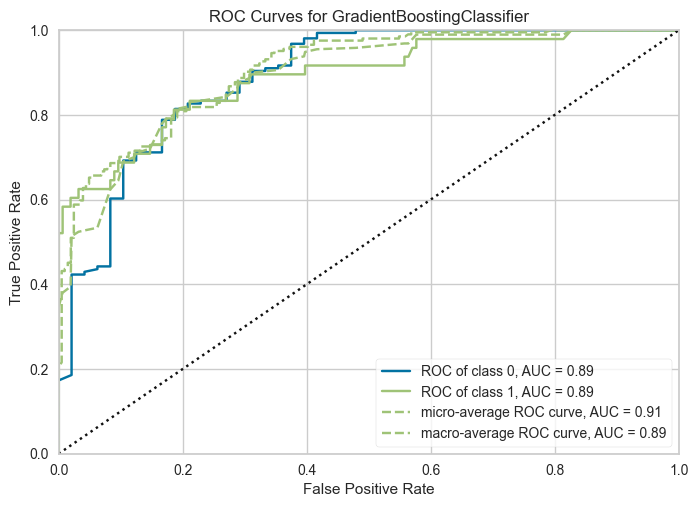

In [51]:
exp5.plot_model(hyper_exp5,plot='auc')

Dari grafik diatas kita dapat melihat bahwa model gradien boositing dapat membedakan 2 kelas dengan baik karena memiliki AUC yang mendekati 0.9. Nilai AUC yang semakin mendekati 1 maka semakin baik model membedakan 2 kelas dengan baik.

**Learning curve**

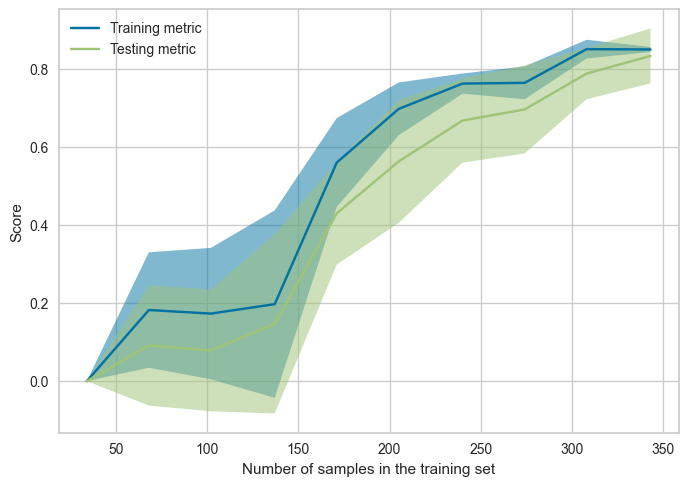

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

X = exp5.get_config("X_train_transformed")
y = exp5.get_config("y_train_transformed")

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "score_type": "both",
    "cv": 10,
    "scoring": ftwo_scorer,
}

LearningCurveDisplay.from_estimator(hyper_exp5, **common_params)

Dari hasil leraning curve diatas dapat lihat bahwa train size yang kita tetapkan sudah sangat baik karena kedua kurva saling berdekatan yang mengartikan bahwa model tidak overfitting dan underfitting

In [53]:
hyper_exp5=exp5.tune_model(bm5,optimize='F2',return_train_score=True)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Dari hasil training dan validasi terjadi penurunan sedikit pada validasi, hal ini mengindikasikan tidak terjadi overfitting dan underfitting

**Kalibrasi Model** 

Kalibrasi probabilitas pada model machine learning sangat penting karena berhubungan dengan ketidakpastian dalam prediksi. Kalibrasi probabilitas membantu mengubah probabilitas yang dihasilkan oleh model agar lebih sesuai dengan realitas. Dengan kalibrasi yang baik, kita dapat lebih percaya pada probabilitas yang dihasilkan oleh model, meningkatkan interpretabilitas model, dan memastikan prediksi yang lebih dapat diandalkan.

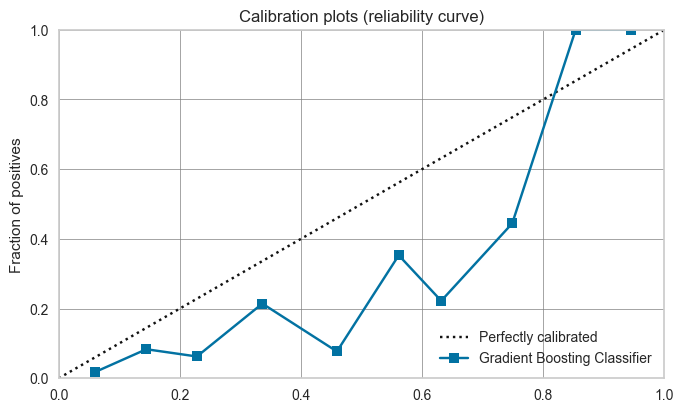

In [54]:
## Plot kalibrasi sebelum dialkuakan kalibrasi
exp5.plot_model(hyper_exp5, plot='calibration')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
Fold,,,,,,,,
0,0.8293,0.9223,0.7895,0.6000,0.6818,0.5681,0.5781,0.7426
1,0.8293,0.8981,0.8947,0.5862,0.7083,0.5949,0.6215,0.8095
2,0.8537,0.9327,0.8421,0.6400,0.7273,0.6298,0.6409,0.7921
3,0.8049,0.9373,0.8947,0.5484,0.6800,0.5510,0.5852,0.7944
4,0.8415,0.9482,0.9474,0.6000,0.7347,0.6296,0.6630,0.8491
5,0.8293,0.8782,0.8500,0.6071,0.7083,0.5923,0.6091,0.7870
6,0.8519,0.9155,0.8947,0.6296,0.7391,0.6400,0.6593,0.8252
7,0.8519,0.9087,0.7895,0.6522,0.7143,0.6155,0.6206,0.7576
8,0.8148,0.8001,0.6842,0.5909,0.6341,0.5111,0.5135,0.6633


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

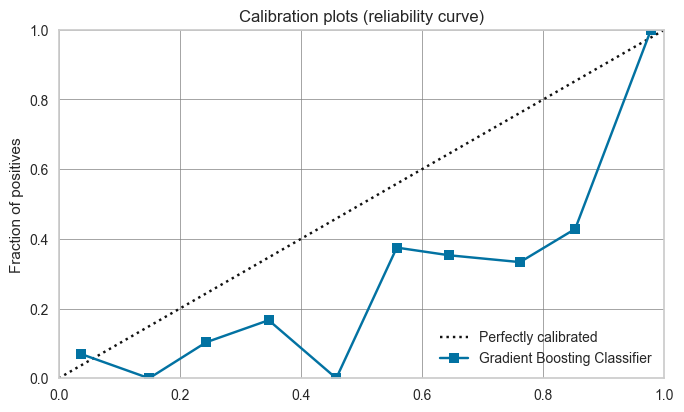

In [55]:
## Plot kalibrasi setelah dilakukan kalibrasi
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = exp5.calibrate_model(estimator=hyper_exp5, method='isotonic')

exp5.plot_model(calibrated_model, plot='calibration')

### FINAL MODEL

In [56]:
final_mod=exp5.finalize_model(calibrated_model)

In [57]:
## Saving Model
exp5.save_model(final_mod,'../Model/Deployment20052024')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
          steps=[('onehot',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=TransformerWrapper(exclude=None,
                                                                    include=['market_segment',
                                                                             'deposit_type',
                                                                             'customer_type'],
                                                                    transformer=OneHotEncoder(categories='auto',
                                                                                              drop='first',
                                                                                              dtype=<class 'numpy.float64'>,
                                                                                              handle_unknown='error

## INTERPRETASI MODEL

### Cara kerja Final Model

![img](../Doc/gradient.png)
sumber: https://www.linkedin.com/pulse/understanding-gradient-descent-algorithm-its-role-linear-mhango-kjbvf/

Final Model yang digunakan yaitu gradient Boosting. Pada setting default yang kita gunakan gradient boosting yang kita gunakan berbasis tree. Model ini dilakukan boosting dengan menggunakan penurunan gradient untuk melakukan pengupdatan weight dengan menggunakan loss log sebagai pengurang pada weight old.

![img](../Doc/boosting.png)

Boosting merupakan suatu proses machine learning yag bersifat iteratif. Boosting merubah model weak learner menjadi strong learner. Weak learner merupakan model machine learning yang performanya sedikit lebih dari pada kita melakukan klasifikasi tetapi secara acak. Boosting memperbaiki model dengan memberikan perhatian lebih terhadap data yang diprediksi salah dengan memberikan bobot/weight yang lebih terhadap data yang diprediksi salah. Proses ini terjadi secara terus menerus sampai pada titik tertentu.

Jadi secara singkat cara kerja gradient Boosting yaitu model berbasis tree yang dilakukan boosting dengan menggunakan penurunan gradient untuk melakukan pengupdatean weight.

### Kinerja Model

Agar kita dapat mengetahui model bekerja dengan baik atau tidak kita perlu melakukan cek direntang manakah probabilitas model dapat memprediksi dengan baik atau tidak

In [58]:
result = exp5.predict_model(final_mod, data=df_seen, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,F2
0,Gradient Boosting Classifier,0.8343,0.9218,0.8410,0.6054,0.7040,0.5932,0.6086,0.7803


In [59]:
bin= pd.cut(result['prediction_score_1'], bins=10, labels=False)
result['group'] = bin
bin_counts = result['group'].value_counts().sort_index()


In [60]:
result

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,prediction_label,prediction_score_0,prediction_score_1,group
31086,GBR,Corporate,0,0,No Deposit,12,Transient-Party,A,0,0,0,0,0.8329,0.1671,1
20887,CHE,Direct,0,2,No Deposit,0,Transient,C,0,1,0,1,0.3141,0.6859,6
4943,BRA,Direct,0,3,No Deposit,0,Transient,E,1,1,0,0,0.9679,0.0321,0
29579,NLD,Online TA,0,0,No Deposit,0,Transient,E,0,4,0,1,0.4417,0.5583,5
80255,BEL,Groups,0,1,No Deposit,185,Transient-Party,D,0,0,0,0,0.9205,0.0795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39590,PRT,Offline TA/TO,1,1,No Deposit,0,Group,E,0,1,1,1,0.1638,0.8362,8
27995,PRT,Online TA,0,2,No Deposit,0,Contract,A,0,2,0,0,0.7440,0.2560,2
74303,USA,Online TA,0,1,No Deposit,0,Transient-Party,C,1,1,0,0,0.9846,0.0154,0
24995,PRT,Groups,0,3,No Deposit,87,Transient-Party,A,0,0,0,0,0.9596,0.0404,0


In [61]:
result.groupby('group').agg(func={'prediction_score_1':['min','max']})

prediction_score_1        
                     min     max
group                           
0                 0.0154  0.1136
1                 0.1181  0.2123
2                 0.2135  0.3105
3                 0.3148  0.4074
4                 0.4100  0.5074
5                 0.5251  0.5946
6                 0.6066  0.7005
7                 0.7061  0.7862
8                 0.8054  0.9004
9                 0.9019  1.0000

In [62]:
from sklearn.metrics import *
results = []

for i in result.group.unique():
    dt = result[result['group'] == i]
    if i <= 4:
        a = balanced_accuracy_score(dt['is_canceled'], dt['prediction_label'])
        b = recall_score(dt['is_canceled'], dt['prediction_label'], pos_label=0)
        c = precision_score (dt['is_canceled'], dt['prediction_label'], pos_label=0)
        d = fbeta_score(dt['is_canceled'], dt['prediction_label'], beta=2,pos_label=0)
    else:
        a = balanced_accuracy_score(dt['is_canceled'], dt['prediction_label'])
        b = recall_score(dt['is_canceled'], dt['prediction_label'])
        c = precision_score (dt['is_canceled'], dt['prediction_label'])
        d = fbeta_score(dt['is_canceled'], dt['prediction_label'], beta=2)

    # Append a dictionary of the results to the list
    results.append({
        'group': i,
        'accuracy': a, 
        'recall': b, 'precision':c,
        'F2':d
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='group')
results_df

,group,accuracy,recall,precision,F2
2,0,0.500000,1.000000,0.991279,0.998244
0,1,0.500000,1.000000,0.930769,0.985342
7,2,0.500000,1.000000,0.894231,0.976891
6,3,0.500000,1.000000,0.888889,0.975610
5,4,0.469697,0.939394,0.815789,0.911765
3,5,0.500000,1.000000,0.314286,0.696203
1,6,0.500000,1.000000,0.238095,0.609756
4,7,0.500000,1.000000,0.383333,0.756579
9,8,0.500000,1.000000,0.750000,0.937500
8,9,0.500000,1.000000,0.935484,0.986395


berikut merupakan rentang probabilitas kinerja machine learning dapat bekerja dengan baik dan tidak:
* 0.01-0.11 = group 0
* 0.11-0.21 = group 1
* 0.21-0.31 = group 2
* 0.31-0.40 = group 3
* 0.41-0.50 = group 4
* 0.51-0.60 = group 5
* 0.61-0.70 = group 6
* 0.71-0.80 = group 7
* 0.81-0.90 = group 8
* 0.91-1.00 = group 9

berdasarkan matrix evaluasi yang digunakan yaitu f2 maka hampir semua rentang bekerja baik diatas 90% tetapi pada group 5,6,7 kinerja model memiliki kinerja kurang baik yang hanya mencapai 60-75%.

### Feature Importance 
- Feature importance berfungsi menjelaskan fitur-fitur manakah yang lebih berperan dalam memprediksi pengunjung melakukan cancel pemesanan hotel atau tidak



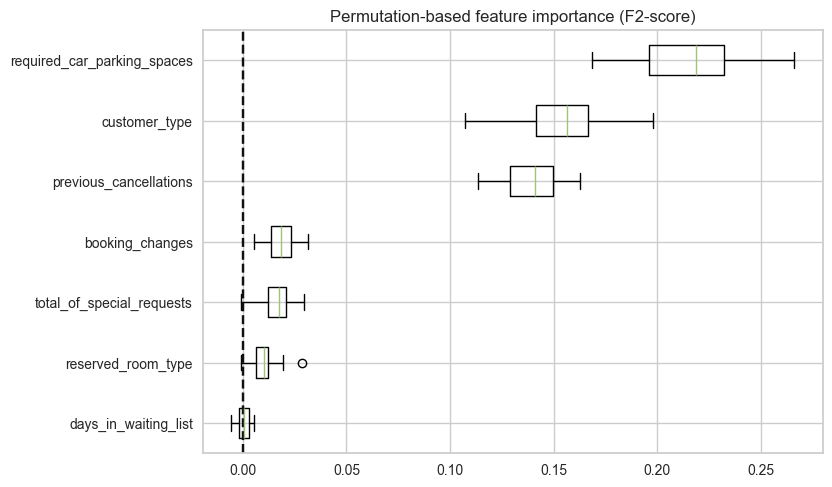

In [63]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, fbeta_score
import matplotlib.pyplot as plt

# specify metric
ftwo_scorer = make_scorer(fbeta_score, beta=2)

# define X_test and y_test
X_train = exp5.get_config('X_train')
y_train = exp5.get_config('y_train')

# plot permutation importance
result = permutation_importance(final_mod, X_train, y_train, n_repeats=30, random_state=42, n_jobs=-1, scoring=ftwo_scorer)
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False,
        labels=X_train.columns[perm_sorted_idx])
plt.axvline(x=0, color="k", linestyle="--")
plt.title("Permutation-based feature importance (F2-score)")
plt.show()

* Required Car Parking Spaces: Fitur ini memiliki nilai F2-score tertinggi, yang berarti jumlah tempat parkir yang diperlukan sangat memengaruhi prediksi pembatalan.
* Customer Type: Jenis pelanggan juga memiliki dampak yang signifikan pada prediksi.
* Fitur lain seperti previous cancellations, booking changes, total of special requests, reserved room type, dan days in waiting list memiliki dampak yang lebih rendah.

### Batasan Model

In [64]:
df_seen.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.490196,1.368627,20.138235,0.296078,1.117647,0.234314
std,2.111444,2.024724,50.378737,0.598152,1.267810,0.423777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.000000,4.250000,1.000000,2.000000,0.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [65]:
df_seen['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

In [66]:
df_seen['reserved_room_type'].unique()

array(['A', 'C', 'E', 'D', 'B', 'H', 'F', 'G', 'P', 'L'], dtype=object)

batasan model untuk memprediksi dengan baik anatara lain:
1. previous_cancellations memiliki rentang antara 0-26
2. booking_changes	memiliki rentang anatara 0-21
3. days_in_waiting_list diantara rentang 0-391
4. total_of_special_requests diantara rentang 0-5
5. tipe dari customer type antara lain: Transient-Party, Transient, Contract, Group
6. kategori dari reserved room type antara lain: A, C, E, D, B, H, F, G, P, L

## Impact Machine Learning

In [67]:
predic_unseen=exp5.predict_model(final_mod,data=df_unseen,raw_score=True,verbose=False)
predic_unseen

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,prediction_label,prediction_score_0,prediction_score_1
69248,ESP,Online TA,0,4,No Deposit,0,Transient,G,1,5,0,0,0.9679,0.0321
8090,GBR,Groups,0,5,No Deposit,0,Transient-Party,A,0,0,0,0,0.8186,0.1814
48500,PRT,Direct,0,0,No Deposit,0,Group,D,1,0,0,0,0.9619,0.0381
65780,PRT,Groups,0,2,No Deposit,1,Transient-Party,D,1,1,0,0,0.9846,0.0154
25349,ITA,Offline TA/TO,0,0,No Deposit,40,Transient-Party,A,0,0,0,0,0.8329,0.1671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65572,PRT,Direct,1,1,No Deposit,0,Transient,A,1,0,0,0,0.8615,0.1385
43727,PRT,Direct,1,0,No Deposit,0,Transient,E,0,3,1,1,0.1638,0.8362
38059,BEL,Groups,0,13,No Deposit,0,Transient-Party,A,0,1,0,0,0.8419,0.1581
1044,GBR,Online TA,0,0,No Deposit,0,Transient,A,2,1,0,0,0.9136,0.0864


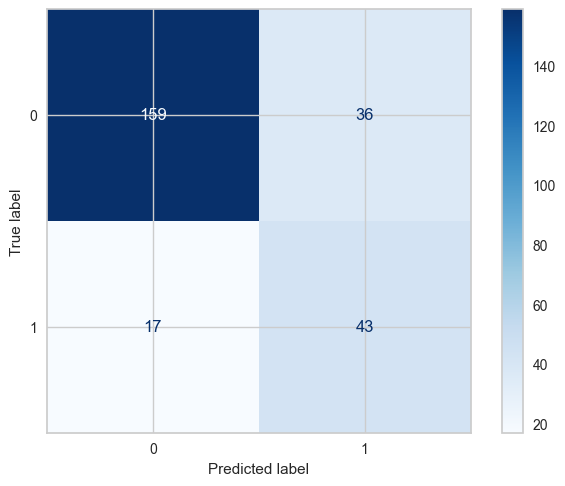

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(predic_unseen['is_canceled'],predic_unseen['prediction_label'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Impact dengan dan tanpa ML
kita melakukan simulasi dampak menggunakan machine learning dan tanpa menggunakan machine learning:
**Tanpa Machine Learning**
1. kita asumsikan tanpa menggunakan machine learning terjadi 100% salah prediksi dengan false positif sebesar 30% dan false negatif sebesar 70% dengan jumlah pemesan sebanyak 255 orang. Maka pihak hotela kan mengalami kerugian sebesar <span style='color:red'>$19061.13</span> yaitu hasil dari false postif 77 orang x $18.69= $1439.13 dan false negatif 178 orang x $99= $17622.
2. kita asumsikan tanpa menggunakan machine learning terjadi 50% salah prediksi dengan false positif sebesar 30% dan false negatif sebesar 20% dengan jumlah pemesan sebanyak 255 orang. Maka pihak hotela kan mengalami kerugian sebesar <span style='color:red'>$6488.13</span> yaitu hasil dari false postif 77 orang x $18.69= $1439.13 dan false negatif 51 orang x $99= $5049

**Menggunakan Machine Learning**

Dengan Menggunakan machine learning maka pihak hotel dapat mengurangi kerugian sebesar                   <span style='color:green'>$4132.29</span>. Dengan jumlah pengunjung yang sama machine learning melakukan salah menebak pada false positif sebesar 36 orang dan false negatif sebesar 17 orang. kerugian yang dialami dengan machine learning sebesar $2355.84 yaitu hasil false poitif 36x18.69= $672.84, dan false negatif 17x99= $1683.


## Counterfactuals Explanation

In [69]:
exp5.get_config('X_test')

,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests
294,0,1,0,Transient,D,1,0
81367,2,1,0,Transient,A,0,4
46479,0,7,0,Transient,F,0,1
4530,0,1,0,Transient-Party,D,1,0
12951,0,0,30,Transient,A,0,0
...,...,...,...,...,...,...,...
1630,0,1,0,Transient,E,1,0
54489,0,1,0,Contract,C,0,0
68080,0,6,8,Transient-Party,A,0,0
1948,0,1,63,Transient-Party,A,0,0


In [70]:
X_test=predic_unseen[['previous_cancellations','booking_changes','days_in_waiting_list','customer_type','reserved_room_type','required_car_parking_spaces','total_of_special_requests']]

In [71]:
filtered_df_lemah = predic_unseen[(predic_unseen['prediction_score_1'] >= 0.5) & (predic_unseen['prediction_score_1'] <= 0.8)].head(1)
filtered_df_lemah.drop(columns=['country','market_segment','deposit_type','is_canceled','prediction_label','prediction_score_0','prediction_score_1'],inplace=True)

In [72]:
filtered_df_tinggi_0 = predic_unseen[(predic_unseen['prediction_score_1'] >= 0.1) & (predic_unseen['prediction_score_1'] <= 0.3)].head(1)
filtered_df_tinggi_0.drop(columns=['country','market_segment','deposit_type','is_canceled','prediction_label','prediction_score_0','prediction_score_1'],inplace=True)

In [73]:
filtered_df_tinggi_1 = predic_unseen[(predic_unseen['prediction_score_1'] >= 0.8) & (predic_unseen['prediction_score_1'] <= 1.0)].head(1)
filtered_df_tinggi_1.drop(columns=['country','market_segment','deposit_type','is_canceled','prediction_label','prediction_score_0','prediction_score_1'],inplace=True)

In [74]:
import dice_ml

continuous_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
# prepare the data
df_train = exp5.get_config('X_train')
df_train['is_canceled'] = exp5.get_config('y_train')
data_dice = dice_ml.Data(dataframe=df_train, continuous_features=continuous_features, outcome_name='is_canceled')
data_dice

# model
rf_dice = dice_ml.Model(model=final_mod, backend="sklearn")

# explainer
explainer = dice_ml.Dice(data_dice, rf_dice, method="kdtree")

**untuk customer yang direntang performa machine learning lemah**

In [75]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(filtered_df_lemah, total_CFs=3, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:03<00:00,  3.67s/it]

Query instance (original outcome : 1)


,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,11,0,0,Transient,E,0,0,1



Diverse Counterfactual set (new outcome: 0)


,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
80030,-,-,-,-,A,1,-,0
38399,-,-,-,-,A,1,1,0
61303,-,-,-,Transient-Party,A,1,-,0


* Agar merubah customer yang diprediksi cancel agar tidak cancel dapat merubah customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests

**Customer yang diprediksi 0/tidak cancel menjadi 1/cancel**

In [76]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(filtered_df_tinggi_0, total_CFs=3, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:03<00:00,  3.67s/it]

Query instance (original outcome : 0)


,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,0,5,0,Transient-Party,A,0,0,0



Diverse Counterfactual set (new outcome: 1)


,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7441,-,-,-,Transient,-,-,-,1
3187,-,-,-,Transient,-,-,-,1
17828,-,-,-,Transient,-,-,-,1


* agar merubah customer yang diprediksi tidak cancel menjadi cancel dapat merubah type customer

**Customer yang diprediksi 1/cancel menjadi 0/tidak cancel**

In [77]:
# Generate CF based on the blackbox model
cf = explainer.generate_counterfactuals(filtered_df_tinggi_1, total_CFs=3, desired_class="opposite")

# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:03<00:00,  3.12s/it]

Query instance (original outcome : 1)


,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,1,0,0,Transient,D,0,1,1



Diverse Counterfactual set (new outcome: 0)


,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
63044,-,-,-,-,-,1,-,0
49938,-,-,-,-,-,1,2,0
168,-,-,-,-,-,1,-,0


* untuk merubah customer yang diprediksi cancel menjadi tidak cancel dapat merubah required_car_parking_spaces, total_of_special_requests

## Conclusion and Recomendation

**Conclution**

Dalam pembuatan machine learning ini menggunakan matrix evaluation F2 dikarenakan untuk meminimalkan type 2 error. terdapat 7 eksperiment dan didapatkan model terbaik pada eksperiment ke 5 yang telah di hyperparameter tunning dengan model gradient boosting, didaptkan F2 score sebesar 0.7726. 

Model dapat digunakan untuk memprediksi potensi cancelation pada pengunjung hotel sehingga dengan hasil prediksi machine learning ini pihak hotel dapat mengambil kebijakan untuk melakukan konfirmasi kepada pengunjung hotel yang terprediksi cancel atau kebijakan lainnya untuk meminimalisir cancelation dari pelanggan tersebut.

Dengan Menggunakan machine learning maka pihak hotel dapat mengurangi kerugian sebesar $4132.29. Perhitungan ini didapat dari hasil selisih kerugian antara penggunaan machine learning dan tanpa penggunaan machine learning. Sehingga penggunaan machine learning ini efektif dalam meningkatkan pendapatan hotel akibat kesalahan prediksi customer yang terprediksi cancel.

**Recomendation**

Dalam penggunaan machine learning ini tetap memperhatikan batasan-batasan agar hasil prediksi machine learning akurat. Berikut batasan final model yang telah dibuat antara lain:
1. previous_cancellations memiliki rentang antara 0-26
2. booking_changes	memiliki rentang anatara 0-21
3. days_in_waiting_list diantara rentang 0-391
4. total_of_special_requests diantara rentang 0-5
5. customer type antara lain Transient-Party, Transient, Contract, Group
6. reserved room type antara lain A, C, E, D, B, H, F, G, P, L


